## Install Biopython to be used to easily load fasta file

In [1]:
!pip install biopython

In [2]:
from Bio import SeqIO
import re
from collections import Counter
import matplotlib.pyplot as plt
print("Biopython successfully installed")

Biopython successfully installed


In [3]:
bauhina_file = "C:/Users/edevo/OneDrive/Documents/file.handling/sequence.fasta"
sequences = list(SeqIO.parse(bauhina_file, "fasta"))

In [4]:
# Check the number of sequences that are in the loaded fasta file
print(f"Num of sequence loaded: {len(sequences)}")

Num of sequence loaded: 1


### Load the fasta file and display it to make sure the notebook has connected to it

In [5]:
for sequence in sequences:
    print("Sequence:", sequence.seq)
    print("Lenght:", len(sequence.seq))

Sequence: ATGTCGCTCACGGTCGTCAGCATGGCGTGCGTTGGGTTCTTCTTGCTGCAGGGGGCCTGGCCACTCATGGGTGGTCAGGACAAACCCTTCCTGTCTGCCCGGCCCAGCACTGTGGTGCCTCGAGGAGGACACGTGGCTCTTCAGTGTCACTATCGTCGTGGGTTTAACAATTTCATGCTGTACAAAGAAGACAGAAGCCACGTTCCCATCTTCCACGGCAGAATATTCCAGGAGAGCTTCATCATGGGCCCTGTGACCCCAGCACATGCAGGGACCTACAGATGTCGGGGTTCACGCCCACACTCCCTCACTGGGTGGTCGGCACCCAGCAACCCCGTGGTGATCATGGTCACAGGAAACCACAGAAAACCTTCCCTCCTGGCCCACCCAGGGCCCCTGCTGAAATCAGGAGAGACAGTCATCCTGCAATGTTGGTCAGATGTCATGTTTGAGCACTTCTTTCTGCACAGAGAGGGGATCTCTGAGGACCCCTCACGCCTCGTTGGACAGATCCATGATGGGGTCTCCAAGGCCAACTTCTCCATCGGTCCCTTGATGCCTGTCCTTGCAGGAACCTACAGATGTTATGGTTCTGTTCCTCACTCCCCCTATCAGTTGTCAGCTCCCAGTGACCCCCTGGACATCGTGATCACAGGTCTATATGAGAAACCTTCTCTCTCAGCCCAGCCGGGCCCCACGGTTCAGGCAGGAGAGAACGTGACCTTGTCCTGTAGCTCCTGGAGCTCCTATGACATCTACCATCTGTCCAGGGAAGGGGAGGCCCATGAACGTAGGCTCCGTGCAGTGCCCAAGGTCAACAGAACATTCCAGGCAGACTTTCCTCTGGGCCCTGCCACCCACGGAGGGACCTACAGATGCTTCGGCTCTTTCCGTGCCCTGCCCTGCGTGTGGTCAAACTCAAGTGACCCACTGCTTGTTTCTGTCACAGGAAACCCTTCAAGTAGTTGGCCTTCACCCACAGAACCAAGC

In [6]:
# Count the number of each of the base and store them in a dictionary
# First create an empty dictionary and fill it with the base as the key and the count as the value

# convert the fasta file into a string
base = str(sequence.seq).upper()
count = {
    "A": base.count("A"),
    "T": base.count("T"),
    "C": base.count("C"),
    "G": base.count("G")
}
print("Base Counts", count)
    

Base Counts {'A': 301, 'T': 315, 'C': 415, 'G': 337}


In [7]:
# Extract the start and stop codon of the sequence
first_codon = sequence.seq[0:3]
last_codon = sequence.seq[-3:]
print("Start Codon:", first_codon)
print("Last Codon:", last_codon)

Start Codon: ATG
Last Codon: TAG


In [8]:
# We can also get the GC content of the sequence
gc_content = ((count["G"] + count["C"]) / len(sequence.seq)) * 100
print("GC Content:", round(gc_content, 2),"%")

GC Content: 54.97 %


Total number of codons in loaded sequence: 456
['ATG', 'TCG', 'CTC', 'ACG', 'GTC', 'GTC', 'AGC', 'ATG', 'GCG', 'TGC']
['CCA', 'CAG', 'TCA', 'GGT', 'CTT', 'GAG', 'GGG', 'GTT', 'TTC', 'TAG']


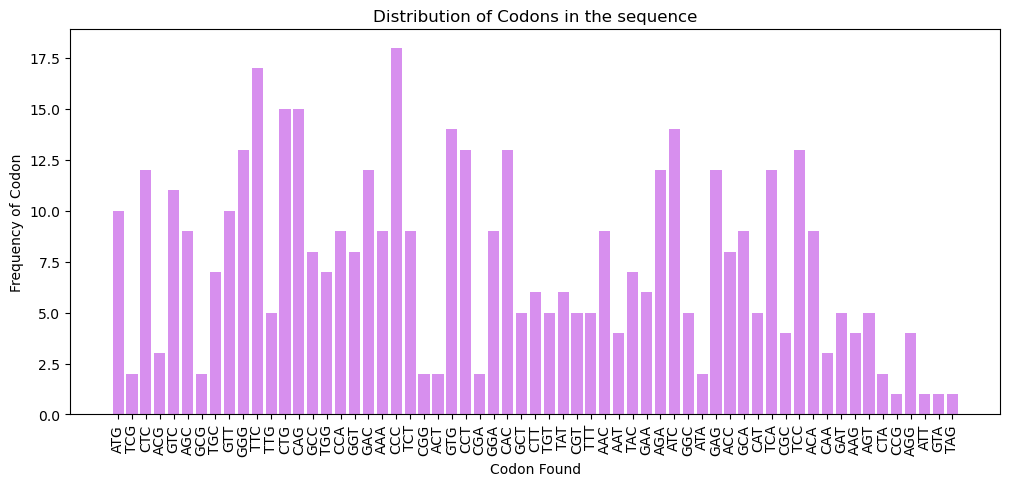

In [9]:
# Split the sequence into codons and store them in a list
codons = [base[i:i+3] for i in range(0, len(base),3)]

# Print out the number of codons in the sequence
print("Total number of codons in loaded sequence:", len(codons))
# Print out the first 10 codons for easy readability
print(codons[0:10])
# Print last 10 as well
print(codons[-10:])
# Count each codon occurrence
codon_freq = Counter(codons)

#for codon, count in codon_freq.items():
    #print(f"{codon}: {count}")
plt.figure(figsize = (12,5))
plt.bar(codon_freq.keys(), codon_freq.values(), color = "#D78FEE")
plt.xticks(rotation=90)
plt.xlabel("Codon Found")
plt.ylabel("Frequency of Codon")
plt.title("Distribution of Codons in the sequence")
plt.show()

In [10]:
# Search for particular motifs in the sequence
# Define the motifs youre looking for in a list
motifs = ["ATG", "TATA", "AAAAA", "TAG"]
# Use a dictionary to store the motif, its position and its count in the sequence
motif_found = {}

for motif in motifs:
    match_found = [m.start() + 1 for m in re.finditer(motif,base)]
    motif_found[motif] = {
        "Count": len(match_found),
        "Positions": match_found
    }
# Print out results using for loop
for motif, result in motif_found.items():
    print(f"Motif: {motif}")
    print(f"Count: {result["Count"]}")
    print(f"Positions found: {result["Positions"]}")

Motif: ATG
Count: 26
Positions found: [1, 22, 67, 175, 244, 266, 282, 346, 429, 440, 445, 515, 518, 556, 582, 587, 662, 749, 785, 876, 1019, 1106, 1117, 1166, 1189, 1298]
Motif: TATA
Count: 1
Positions found: [659]
Motif: AAAAA
Count: 2
Positions found: [1099, 1227]
Motif: TAG
Count: 5
Positions found: [732, 792, 963, 1152, 1366]


In [12]:
# Save results to a seperate file

with open("results.txt", "w") as f:
    f.write("Base counts:\n")
    for key, value in count.items():
        f.write(f"{key}:{value}\n")
    f.write("Codons:\n")
    for item in codons:
        f.write(item + ",")
    f.write("Motifs and positions:\n")
    for key, value in motif_found.items():
        f.write(f"{key}:{value}\n")
